In [11]:
import torch as tc
from torch import nn
from torch.nn import functional as F


class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 5)
        self.conv2 = nn.Conv2d(16, 8, 5)
        self.conv_transpose1 = nn.ConvTranspose2d(8, 16, 5)
        self.conv_transpose2 = nn.ConvTranspose2d(16, 1, 5)
    
    def forward(self, x):
        x = self.encode(x)
        return self.decode(x)
        
    
    def encode(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        return x
    
    def decode(self, x):
        x = F.relu(self.conv_transpose1(x))
        x = F.relu(self.conv_transpose2(x))
        return x

In [4]:
from torchvision import transforms
import torchvision as tv
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor()])
trainset = tv.datasets.FashionMNIST(root='data/', train=True, download=True, transform=transform)
testset = tv.datasets.FashionMNIST(root='data/', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, shuffle=True, batch_size=4)
testloader = DataLoader(testset, shuffle=False, batch_size=4)

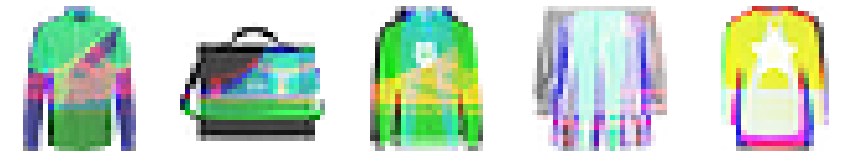

In [5]:
from matplotlib import pyplot as plt
import numpy as np
data = iter(trainloader)
plt.figure(figsize=(15, 5))
for i in range(5):
    images, label = next(data)
    plt.subplot(1, 5, i+1)
    plt.imshow(transforms.ToPILImage()(images.transpose(1, 0)[0]))
    plt.axis('off')
plt.show()

In [12]:
from torch import optim
device = tc.device('cuda:0')

auto_encoder = AutoEncoder()
auto_encoder.to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(auto_encoder.parameters(), lr=0.01)
for epoch in range(1):
    for images, label in trainloader:
        images = images.to(device)
        x = auto_encoder(images)
        optimizer.zero_grad()
        loss = loss_fn(x, images)
        loss.backward()
        optimizer.step()

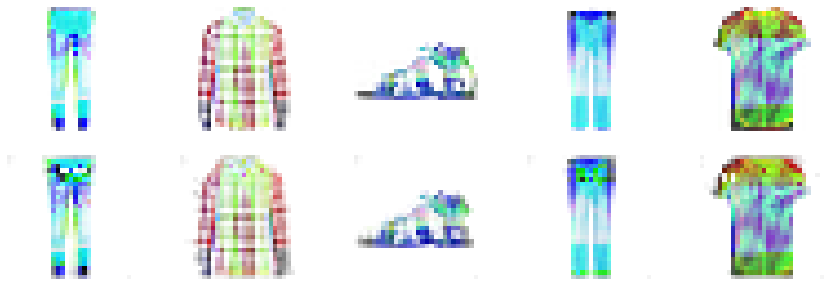

In [15]:
from matplotlib import pyplot as plt
import numpy as np
data = iter(testloader)
fig, axes = plt.subplots(2, 5, figsize=(15, 5))

for i in range(5):
    images, _ = next(data)
    images = images.to(device)
    ax = axes[0][i]
    ax.imshow(transforms.ToPILImage()(images.transpose(1, 0)[0].cpu()))
    ax.axis('off')
    
    reconstruct_images = auto_encoder(images)
    ax = axes[1][i]
    ax.imshow(transforms.ToPILImage()(reconstruct_images.transpose(1, 0)[0].cpu()))
    ax.axis('off')
plt.show()